In [3]:
import xgboost as xgb 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create DMatrix - XGBoost's internal data structure
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [6]:
params = {
  'objective': 'reg:squarederror',  # The objective function for regression (squared error loss)
  'eval_metric': 'rmse',            # Evaluation metric (root mean squared error)
  'eta': 0.1,                       # Learning rate (controls how fast we move towards the optimum)
  'max_depth': 5,                    # Maximum depth of each decision tree
  'subsample': 0.8,                  # Fraction of samples used to build each tree (reduces overfitting)
  'colsample_bytree': 0.8           # Fraction of features used to build each tree (reduces overfitting)
}

In [7]:
# Train the model with 100 boosting rounds
num_round = 100
model = xgb.train(params, dtrain, num_round)

In [8]:
# Make predictions on the test set
y_pred = model.predict(dtest)

In [9]:
# Evaluate the performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3800.3822661480854


Text(0.5, 1.0, 'XGBoost')

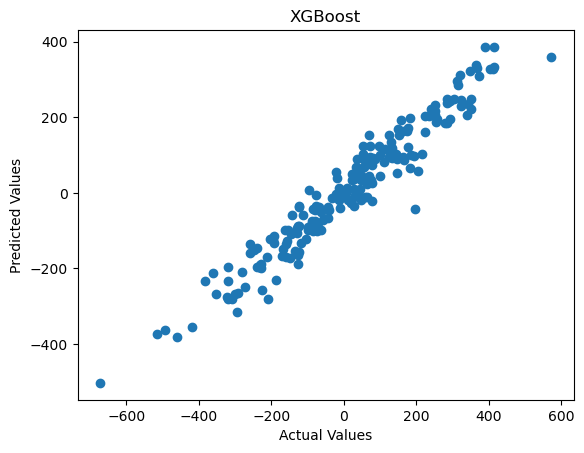

In [10]:
import matplotlib.pyplot as plt 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost')